In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import volume_grating as vg
import volume_grating.utilities
from volume_grating.utilities.geometry import cartersian_to_spherical, spherical_to_cartesian, point_to_ndarray, vector_to_ndarray
from volume_grating.utilities.surface_fitting import *
from volume_grating.utilities.validation import validate_input_numeric
import matplotlib.pyplot as plt
from tqdm import tqdm

from volume_grating import *

from volume_grating.routines import sweep

import importlib

# GCS = vec.CoordSys3D('GCS')

In [2]:
mat_lib = materials.cauchy_dict
pp_org = materials.Cauchy_2coeff(mat_lib['pp_original'])
air = materials.air

## Estimate dn from analytical reflection

$R=tanh^2(\frac{\pi \cdot \delta n \cdot d \cos\theta}{\lambda}) = 0.99$

In [3]:
dn = np.arctanh(np.sqrt(0.99))*660e-9/np.pi/70e-6
print('dn =', dn)

dn = 0.008983282849890273


# Define HOE

In [4]:
thickness = 50e-6
dn = 0.01

In [5]:
src1 = sources.Planewave(material=pp_org, direction=[0,0,-1], wavelength=660e-9)
src2 = sources.Planewave(material=pp_org, direction=[-1,0,1], wavelength=660e-9)
recording = illumination.Record(src1, src2)

In [6]:
hoe = holograms.Hologram(thickness=thickness, material=pp_org, dn=dn, recording=recording)

### Define playback

In [7]:
src3 = sources.Planewave(material=pp_org, direction=[0,0,-1], wavelength=660e-9)

In [8]:
playback = illumination.Playback(src3)

# Define solver and engine

In [9]:
wavelengths = np.linspace(650, 670, 101)*1e-9

In [10]:
ka = engines.KogelnikAnalytical()
kt = engines.KogelnikTwoWave()

In [11]:
solver = solvers.Response(hoe, playback=playback, engine=ka, order=1)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.77it/s]


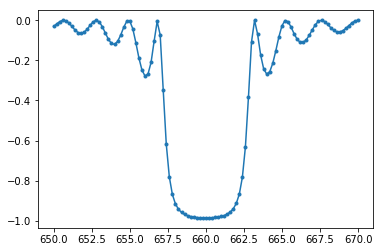

In [12]:
DE, caches = solver.get_efficiency_at_points([GCS.origin], wavelengths=wavelengths, analytical_aid=False, tol=0.01, 
                                     max_nodes=int(1e6))
plt.plot(wavelengths/1e-9, DE[0], '.-')

In [13]:
caches[0].keys()

dict_keys(['kappa', 'dephase', 'cr', 'cs', 's', 'r_end'])

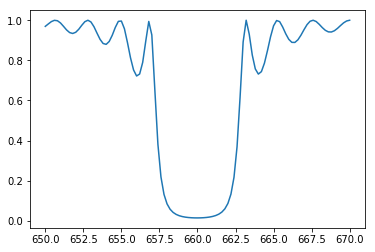

In [14]:
plt.plot(wavelengths/1e-9, np.abs(caches[0]["r_end"])**2)

In [15]:
caches[0]['s']

array([-1.74765489e-01+1.19531250e-01j, -1.02979753e-01+1.27837200e-01j,
       -3.70104046e-02+9.22695249e-02j, -1.81243186e-03+2.21554286e-02j,
       -1.31960685e-02-5.91674106e-02j, -7.00305668e-02-1.22578832e-01j,
       -1.54049240e-01-1.45231271e-01j, -2.37752912e-01-1.19327940e-01j,
       -2.94982145e-01-5.33685182e-02j, -3.08576545e-01+3.23740205e-02j,
       -2.73844785e-01+1.12028730e-01j, -1.99589620e-01+1.59949923e-01j,
       -1.07815561e-01+1.56951426e-01j, -3.04738267e-02+9.79456932e-02j,
       -6.14017079e-06-1.47589727e-03j, -3.43157468e-02-1.06491533e-01j,
       -1.25403110e-01-1.77062023e-01j, -2.42392575e-01-1.87003057e-01j,
       -3.46963316e-01-1.33884097e-01j, -4.08281938e-01-3.54500944e-02j,
       -4.09493190e-01+7.95406333e-02j, -3.48315882e-01+1.78180110e-01j,
       -2.37811745e-01+2.27277107e-01j, -1.09920320e-01+1.99424977e-01j,
       -1.62195056e-02+8.76358579e-02j, -1.13969626e-02-7.53193254e-02j,
       -1.15402689e-01-2.18793448e-01j, -2.90182051

In [16]:
solver = solvers.Response(hoe, playback=playback, engine=kt, order=1)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

(0.9398334880055366-0.29359374810220745j) (-0.17476548874859935+0.11953124957625934j)
Solved in 5 iterations, number of nodes 37, maximum relative residual 1.64e-04.
(0.944087956704498-0.30056790012605594j) (-0.102979752621004+0.12783720028272916j)
Solved in 5 iterations, number of nodes 29, maximum relative residual 5.06e-04.
(0.94667022158702-0.31157263665878826j) (-0.03701040458503745+0.09226952487343522j)
Solved in 10 iterations, number of nodes 338, maximum relative residual 8.19e-04.
(0.9454519710468086-0.3252436415704055j) (-0.0018124318604304899+0.022155428618734645j)
Solved in 5 iterations, number of nodes 33, maximum relative residual 4.48e-04.
(0.9394329736909643-0.33905227638106283j) (-0.013196068450031545-0.0591674106303011j)
Solved in 5 iterations, number of nodes 23, maximum relative residual 9.55e-04.
(0.9293624108889517-0.3502382560011209j) (-0.07003056683233078-0.12257883186612967j)
Solved in 6 iterations, number of nodes 29, maximum relative residual 3.89e-04.
(0.917

Number of nodes is exceeded after iteration 14, maximum relative residual 1.44e-03.
(0.11654522804326135-0.020366603488139817j) (-0.11042351188480175+1.176123804829174j)
Number of nodes is exceeded after iteration 14, maximum relative residual 1.47e-03.
(0.11758033508155381+1.4780037298475795e-14j) (8.023903134564404e-14+1.1809580300224882j)
Number of nodes is exceeded after iteration 14, maximum relative residual 1.48e-03.
(0.11699483286171113+0.020399260598758066j) (0.11031291717838629+1.1751841422538591j)
Number of nodes is exceeded after iteration 14, maximum relative residual 1.47e-03.
(0.11476640893727531+0.04112803033695607j) (0.22035761273133778+1.158688143421019j)
Number of nodes is exceeded after iteration 14, maximum relative residual 1.44e-03.
(0.11081215543623942+0.06251305698198963j) (0.32994489837663105+1.131081921658305j)
Number of nodes is exceeded after iteration 14, maximum relative residual 1.39e-03.
(0.10498325824684393+0.08494551618908794j) (0.4388143243301328+1.0

Solved in 13 iterations, number of nodes 2113, maximum relative residual 9.93e-04.
(0.9432104935515656+0.3118233219800199j) (0.0690367386202724-0.11465770486428155j)
Solved in 6 iterations, number of nodes 29, maximum relative residual 3.51e-04.
(0.9511920516232873+0.30257767095604954j) (0.019761036123543622-0.06804873984690787j)
Number of nodes is exceeded after iteration 14, maximum relative residual 3.99e-03.
(0.9565790509783596+0.29143290063243443j) (0.00012805974759715947-0.00564467949457636j)
Solved in 9 iterations, number of nodes 108, maximum relative residual 9.02e-04.


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:59<00:00, 59.87s/it]


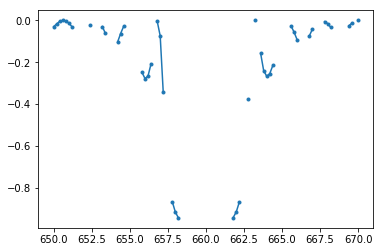

In [17]:
DE, _ = solver.get_efficiency_at_points([GCS.origin], wavelengths=wavelengths, analytical_aid=True, tol=0.001, 
                                     max_nodes=int(1e4), mesh_number=2)

plt.plot(wavelengths/1e-9, DE[0], '.-')

In [18]:
a = np.array([1,2,3,4])

In [19]:
result = np.repeat(np.expand_dims(a.reshape((2,2)), axis=-1), repeats=3, axis=-1)

In [20]:
result[0][0][1]

1

In [21]:
break

SyntaxError: 'break' outside loop (<ipython-input-21-6aaf1f276005>, line 4)

In [ ]:
param = solver.extract_params(wavelengths=660e-9)
param

In [ ]:
from scipy.integrate import solve_bvp

from volume_grating.engines import KogelnikTwoWave, KogelnikAnalytical

In [ ]:
mesh_number = 5
analytical_aid = False

In [ ]:

mode = param['mode']
k_r = param['k_r']/1e6  # reference wave vector, now in 1/um unit
k_d = param['k_d']/1e6  # diffracted wave vector, now in 1/um unit
K = param['K']/1e6  # grating vector, now in 1/um unit
thickness = param['thickness']/1e-6  # now in um
n0 = param['n0']
dn = param['dn']
wavelengths = param['wavelength']/1e-6  # now in um
# wavelengths = np.array([661e-9])/1e-6

# pre-define ``matrix`` that will be updated later.
global matrix
matrix = np.ndarray(shape=(2, 2), dtype=np.complex)

# from approximation of (n0+dn)^2 ~ n0^2 + 2*n0*dn, so ep0 = n0^2, ep1~n0*dn
ep0 = n0 ** 2
ep1 = 2 * dn * n0

z = np.linspace(0.0, thickness, mesh_number)

efficiency = np.zeros_like(wavelengths)*np.nan

def _rhs(x, y):
    """
    A function to compute a state [dAr/dz, dAd/dz].

    :param x: indendent variable of the problem, i.e. z. But it is not needed for uniform gratings.
    :param y: current state, i.e. [Ar, Ad]
    :return [dAr/dz, dAd/dz]: (2,) ndarray
    """
    matrix_h = np.reshape(matrix, newshape=(2, 2))
    dy = np.matmul(matrix_h, y)
    return dy

def _boundary_for_reflection(ya, yb):
    return np.array([ya[0] - 1, yb[1]])

def _boundary_for_transmission(ya, yb):
    return np.array([ya[0] - 1, ya[1]])

if analytical_aid:
    eff_anlt, _, caches_anlt = KogelnikAnalytical.solve(param)
    s_anlt = caches_anlt["s"]

for i, wavelength in enumerate(wavelengths):
    k0 = 2 * np.pi / wavelength  # free space wavenumber
    beta = k0 * n0[i]

    gamma0 = k0**2 * ep0[i]
    gamma = k0**2 * ep1[i] / 2

    kz_r = k_r[i][-1]
    kz_d = k_d[i][-1]

    matrix = np.reshape(matrix, newshape=(2, 2))
    
    matrix[0, 0] = -(gamma0 - np.sum(k_r**2)) / 2 / 1j / kz_r
    
    matrix[0, 1] = -gamma/2/1j/kz_r
    matrix[1, 0] = -gamma/2/1j/kz_d

    matrix[1, 1] = -(gamma0 - np.sum(k_d[i]**2)) / 2 / 1j / kz_d
    
    matrix = np.reshape(matrix, newshape=(matrix.size,))

    y_guess = np.ndarray(shape=(2,mesh_number), dtype=np.complex)

    if mode == "transmission":
        print("Transmission not doing anything yet.")

    if mode == "reflection":
        if analytical_aid:
            y_guess[0] = np.linspace(1.0, caches_anlt['r_end'][i], z.size, dtype=np.complex)
            y_guess[1] = np.linspace(caches_anlt['s'][i], 0.0, z.size, dtype=np.complex)
        else:
            y_guess[0] = np.linspace(1.0, 0.5, z.size, dtype=np.complex)
            y_guess[1] = np.linspace(0.5, 0.0, z.size, dtype=np.complex)
        boundary_func = _boundary_for_reflection
    

In [ ]:
verbose = 1
max_nodes = 1e4
tol = 1e-3

result_detail = solve_bvp(fun=_rhs,
                              bc=boundary_func, x=z, y=y_guess,
                              verbose=verbose, max_nodes=max_nodes,
                              tol=tol)

result_detail.success

In [ ]:
plot_solution(result_detail, func=lambda x: np.abs(x)**2)

In [ ]:
def plot_solution(bvp_result, func=None):
    plt.figure()
    for i in range(bvp_result.y.shape[0]):
        if func is None:
            yval = bvp_result.y[i]
        else:
            yval = func(bvp_result.y[i])
        plt.plot(bvp_result.x, yval)
    plt.xlabel('x')
    plt.ylabel('ys')
    plt.show()

In [ ]:
bv = np.zeros(shape=(2, 2), dtype=np.complex)*np.nan
bv[0, 0] = 1
bv[1, 1] = 0.0

def find_solution(rhs, t_span, y0, max_step=0.01):
    iv = np.array([1, y0], dtype=np.complex)
    result_detail = solve_ivp(rhs, t_span=t_span, y0=iv, max_step=max_step)
    solutions = result_detail.y
    return solutions, result_detail.t

def get_boundary_values(solutions):
    bv = np.zeros(shape=(solutions.shape[0], 2), dtype=np.complex)
    for i in range(solutions.shape[0]):
        bv[i][0] = solutions[i][0]
        bv[i][-1] = solutions[i][-1]
    return bv

def loss_func(x, rhs, t_span, bv):
        
    sol, _ = find_solution(rhs, t_span, x)
    bv_sol = get_boundary_values(sol)
    loss = np.nansum(np.abs(bv-bv_sol)**2)

    return loss

def solve_bvp_by_shooting(rhs, t_span, bv, y20 = 0.01):
    
    result = minimize(fun=loss_func, x0=y20, args=(rhs, t_span, bv))
#     result = leastsq(func=loss_func, x0=y20, args=(rhs, t_span, bv))
    
    return result

In [ ]:
z = np.linspace(0, thickness, 2)

sol, z_span = find_solution(_rhs, z, -0.2*1j)

plt.plot(z_span, np.abs(sol[0])**2)
plt.plot(z_span, np.abs(sol[1])**2)

plt.ylim(bottom=0)
plt.show()

In [ ]:
bvals = get_boundary_values(sol)
bvals

In [ ]:
result = solve_bvp_by_shooting(_rhs, z, bv, y20=0.5)

In [ ]:
loss = loss_func(result.x, _rhs, z, bv)
loss

In [ ]:
z = np.linspace(0, thickness, 2)

sol, z_span = find_solution(_rhs, z, result.x)

plt.plot(z_span, np.abs(sol[0])**2)
plt.plot(z_span, np.abs(sol[1])**2)

plt.ylim(bottom=0)
plt.show()

In [ ]:
break

In [ ]:
# DE, _ = solver.get_efficiency_at_points([GCS.origin], wavelengths=wavelengths, analytical_aid=True, tol=0.001, 
#                                      max_nodes=int(1e6))

# plt.plot(wavelengths/1e-9, DE[0], '.-')

In [ ]:
def get_bandwidth_spectral_at_points(points:Callable):
    pass

In [ ]:
kt.solve_default

In [ ]:
break

In [ ]:
K_mag = solver.get_k_hologram_at_points([GCS.origin])[0].magnitude()
bw_spectral = np.pi*(4*np.pi*pp_org.n(660e-9))/hoe.thickness/K_mag**2 * 2 * 2

bw_spectral

In [ ]:
def update_angle(angle, solver):
    src = solver.playback.source
    
    src.direction = [-np.sin(np.deg2rad(angle)), 0, -np.cos(np.deg2rad(angle))]
    
    return solver

In [ ]:
angles = np.linspace(-5, 5, 201)

solver_funcs = [solvers.Response.get_efficiency_at_points]

DE = sweep(angles, [GCS.origin], update_func=update_angle, solver=solver, solver_funcs=solver_funcs, verbose=True)

In [ ]:
plt.plot(angles, -DE.squeeze())